# **Can Social Media Sentiment Drive Stock Prices?**

# _Book 2: TSLA Stock Data - Cleaning, EDA and Time Series Analysis_


# Table of Contents
[Approach](#Approach)\
[Basic EDA](#Basic-EDA)
- [Cleaning - Missing Values and Dates](#Cleaning---Missing-Values-and-Dates)
- [Create Year, Month, Day columns](#Create-Year,-Month,-Day-columns)
- [Monthly data EDA](#Monthly-data-EDA)

[Time Series Analysis](#Time-Series-Analysis)
- [Trend-Seasonal Decomposition](#Trend-Seasonal-Decomposition)

[Data Analysis for the time frame presented in Book 1, based on Reddit data (1 year; July 2021 to July 2022)](#Data-Analysis-for-the-time-frame-presented-in-Book-1,-based-on-Reddit-data-(1-year;-July-2021-to-July-2022))\
[Baseline](#Baseline)\
[Feature Engineering](#Feature-Engineering)

# Approach
This book will focus on preparing the Tesla Stock data (ticker: TSLA) for a Time series forecasting analysis. Additional EDA will be completed to gain further insights into the data.

This analysis will help to further provide information about predicted drive of stock price based solely on the historical pricing data. Once we determine a predicted rise or drop, we can use that to see if there will be a further drop or rise based on social media sentiment.

Goal of a time series forecast model:
- understand the patterns and relationships in the observed data,
- model the processes that gave rise to the observations, and
- forecast future behavior of the series using past observations.

In [ ]:
# download the Yahoo finance python package to local computer
!pip install yfinance -q

Download `yfinance` package to read in data from Yahoo Finance.

In [ ]:
# import the basic packages
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

# finance
import yfinance as yf

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data for TSLA ticker using yfinance package
tsla = yf.Ticker('TSLA')

# pull historical stock data -- max period refers to when the company went public to present --- in this case we will only collect the data form IPO June 29, 2010 to September 01, 2023
hist_tsla = tsla.history(start='2010-06-29', end='2023-09-02')

## Basic EDA

In [ ]:
# what does the data look like
hist_tsla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-28 00:00:00-04:00,242.580002,244.380005,235.350006,238.820007,107673700,0.0,0.0
2023-08-29 00:00:00-04:00,238.580002,257.480011,237.770004,257.179993,134047600,0.0,0.0
2023-08-30 00:00:00-04:00,254.199997,260.510010,250.589996,256.899994,121988400,0.0,0.0


In [ ]:
# create a new column for the date, and convert to datetime, this will teh be used to set the index
hist_tsla['date'] = hist_tsla.index
hist_tsla['date'] = hist_tsla['date'].dt.date
hist_tsla['date']

print(f"The TSLA stock is from date range {hist_tsla['date'].min()} to {hist_tsla['date'].max()}.")

The TSLA stock is from date range 2010-06-29 to 2023-09-01.


In [ ]:
# how many rows and columns
print(f"The stock data set contains {hist_tsla.shape[0]} rows.\nThe stock data set contains {hist_tsla.shape[1]} columns.")

The stock data set contains 3318 rows.
The stock data set contains 8 columns.


The data set for the Tesla stock is fairly small, containing under 4000 records. This is expected since TSLA is relatively new. Tesla went public June 29, 2010. Since the data set is small, based on the total number of records, we will essentially off-set this by including new features. We will feature engineer several columns to make sure the dataset is robust and shows all complexities of the data -- this will be seen later in the work book.

In [ ]:
hist_tsla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,2010-06-29
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,2010-06-30
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,2010-07-01
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,2010-07-02
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,2010-07-06


In [ ]:
# what does the numeric columns look like at a quick glance
hist_tsla.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3318.000000,3318.000000,3318.000000,3318.000000,3.318000e+03,3318.0,3318.000000
mean,66.250759,67.730152,64.650461,66.228358,9.623769e+07,0.0,0.002411
std,99.067663,101.313916,96.577523,98.978892,8.089332e+07,0.0,0.101215
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,10.000000,10.262167,9.755167,9.971000,4.518338e+07,0.0,0.000000
50%,16.702332,16.950001,16.464000,16.704000,7.961625e+07,0.0,0.000000
75%,55.521332,56.353833,54.056666,54.668499,1.227596e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


We can see that majority of the features have similar ranges, which makes sense as the `Open`, `High`, `Low` and `Close` features all represent the stock price for the day, throughout the trading day. `Close` is our target feature.

`Volume` is the amount of sales made for the trading day -- ranges from 1.7M to 914M trades per day.

`Dividends` shows no information as Tesla does not provide a dividend for their stock -- this can be dropped.

`Stock Splits` is essentially a correction factor to the stock valuation. If the stock price has risen too high, new investors will not be able to invest -- a split is used to bring down the stock price, but increases the number of shares.

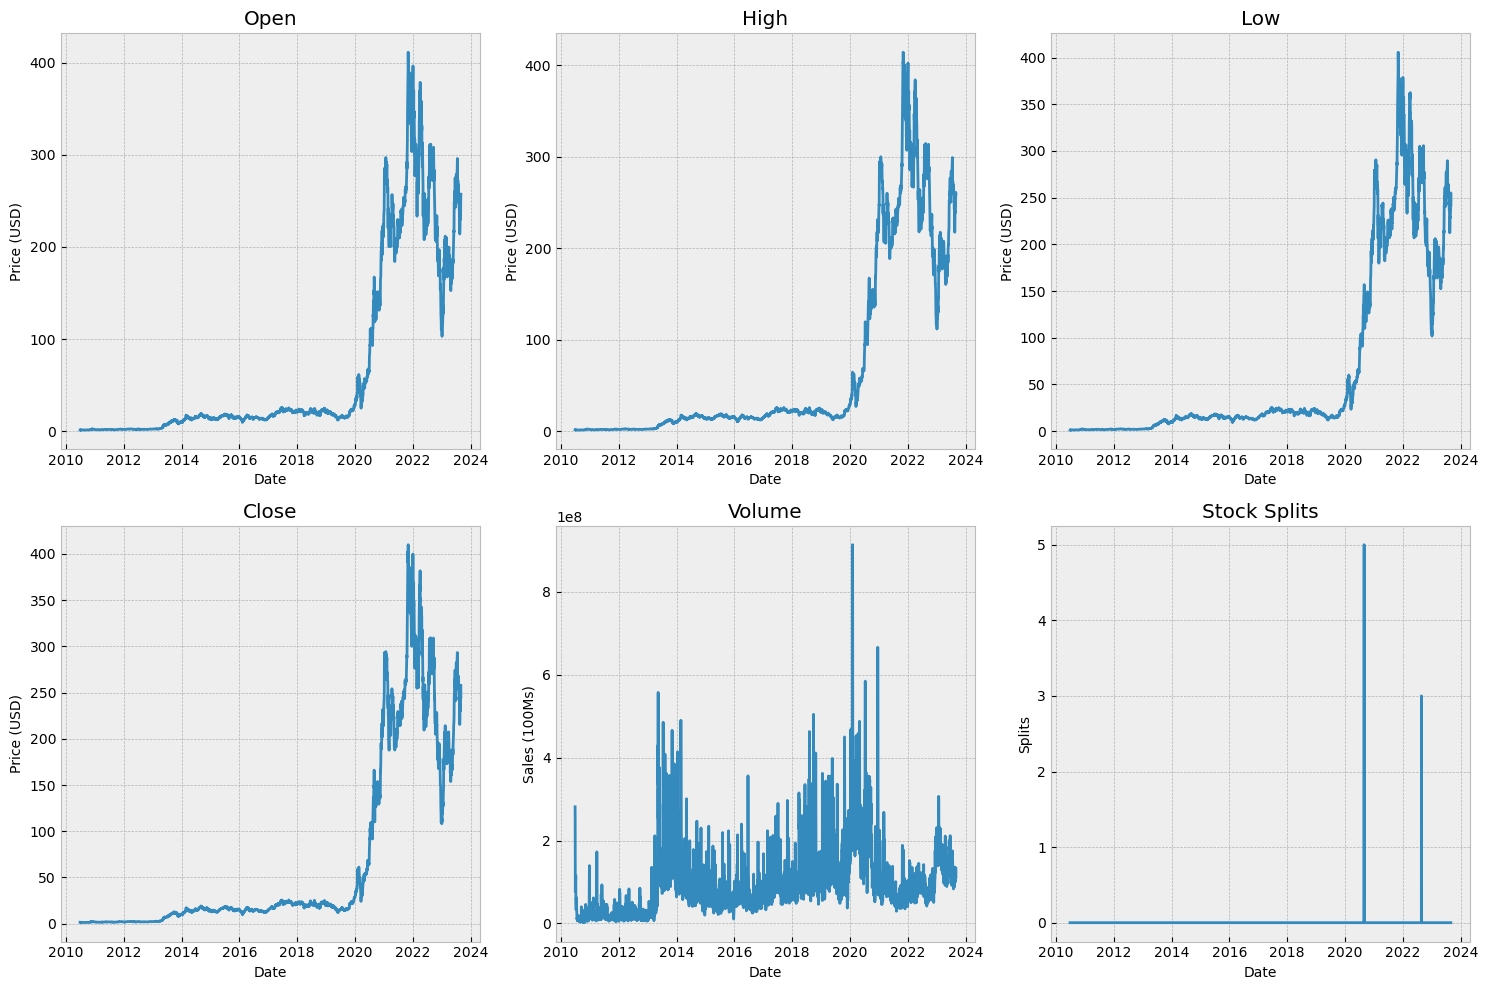

In [ ]:
# plot the features to see what the data looks like

plt.subplots(2,3, figsize=(15,10))
columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Stock Splits']

for i, col in enumerate(columns):
    plt.subplot(2,3,i+1)
    plt.plot(hist_tsla[col])
    plt.xlabel('Date')
    plt.title(col)
    if col=='Open' or col=='High' or col=='Low' or col=='Close':
        plt.ylabel('Price (USD)')
    elif col=='Volume':
        plt.ylabel('Sales (100Ms)')
    else:
        plt.ylabel('Splits')

plt.tight_layout()
plt.show()

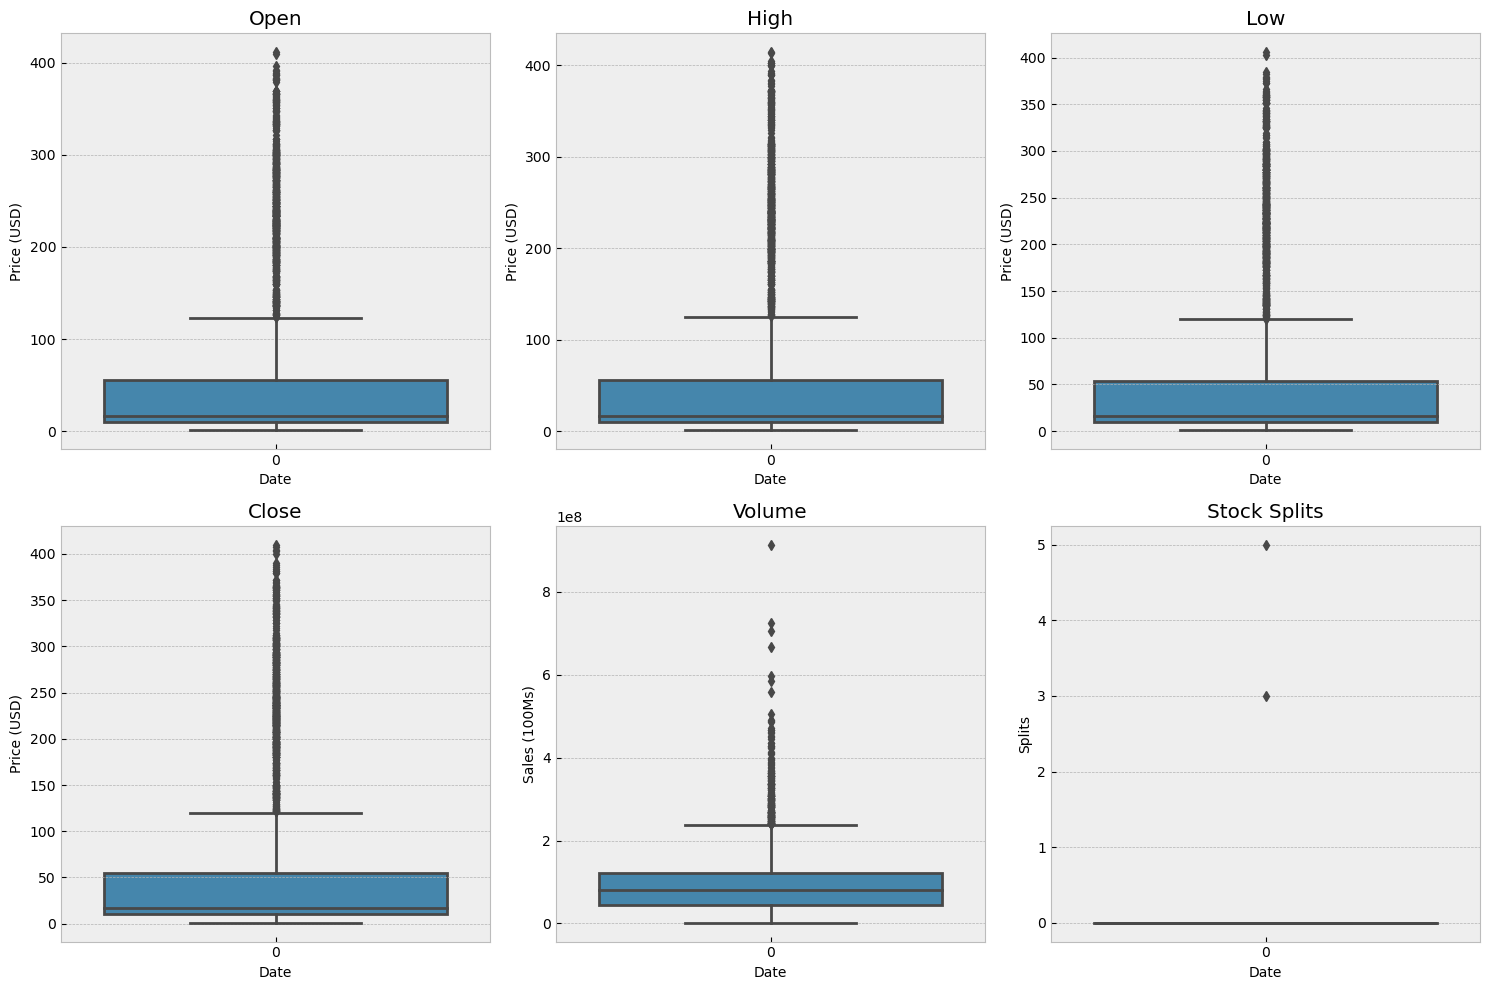

In [ ]:
# distribution of each column

plt.subplots(2,3, figsize=(15,10))
columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Stock Splits']

for i, col in enumerate(columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(hist_tsla[col])
    plt.xlabel('Date')
    plt.title(col)
    if col=='Open' or col=='High' or col=='Low' or col=='Close':
        plt.ylabel('Price (USD)')
    elif col=='Volume':
        plt.ylabel('Sales (100Ms)')
    else:
        plt.ylabel('Splits')

plt.tight_layout()
plt.show()


We can see that the distribution is for all features in the data is highly skewed to the right (with a large left tail) -- there is a high number of outliers in the data.


As stated before Open/High/Low/Close are very similar in distribution. `Stock Splits` does not provide much information. This can be dropped.

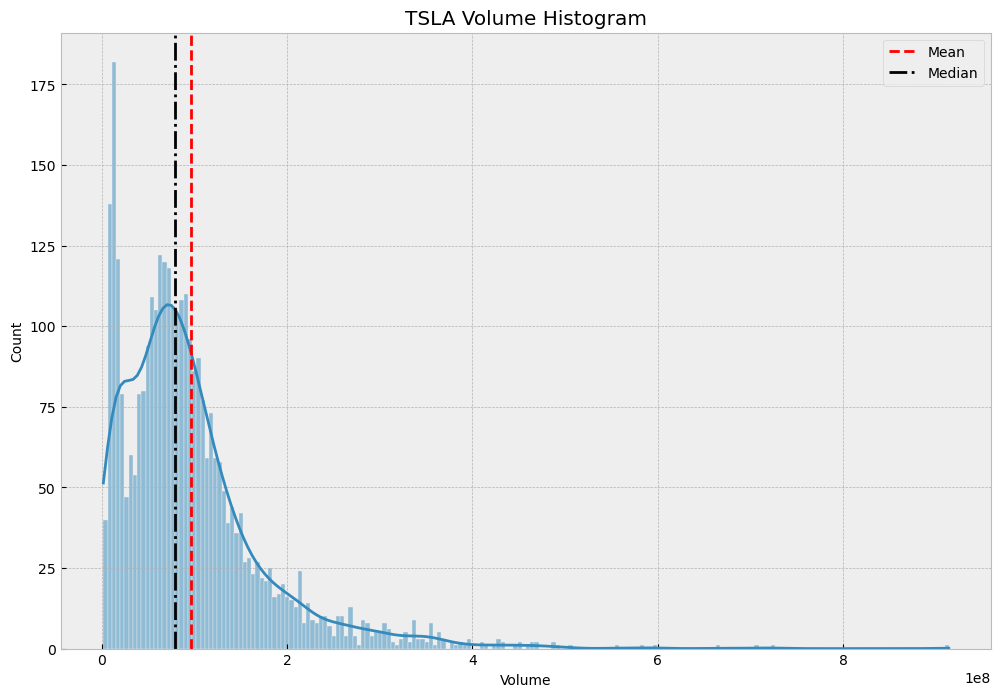

In [ ]:
# plot the histogram for the volume

plt.figure(figsize=(12,8))

# kde computes a density estimate to smooth the distributuion ans dhow on the same plot
sns.histplot(data = hist_tsla['Volume'], bins=200, alpha=0.5, kde=True)
plt.axvline(hist_tsla['Volume'].mean(), color="red", ls='--', label='Mean')
plt.axvline(hist_tsla['Volume'].median(), color="black", ls='-.', label='Median')

plt.title("TSLA Volume Histogram")
plt.legend()
plt.show()

The histogram for the volume of sales tells us that there us a significant skew in the data. The distribution is right skewed, with a very long left tail. This makes sense as this is typical for all stocks. We typically would not see a peak in the left tail as that would mean people are purchasing TSLA stock by the millions every day, that is just not feasible.

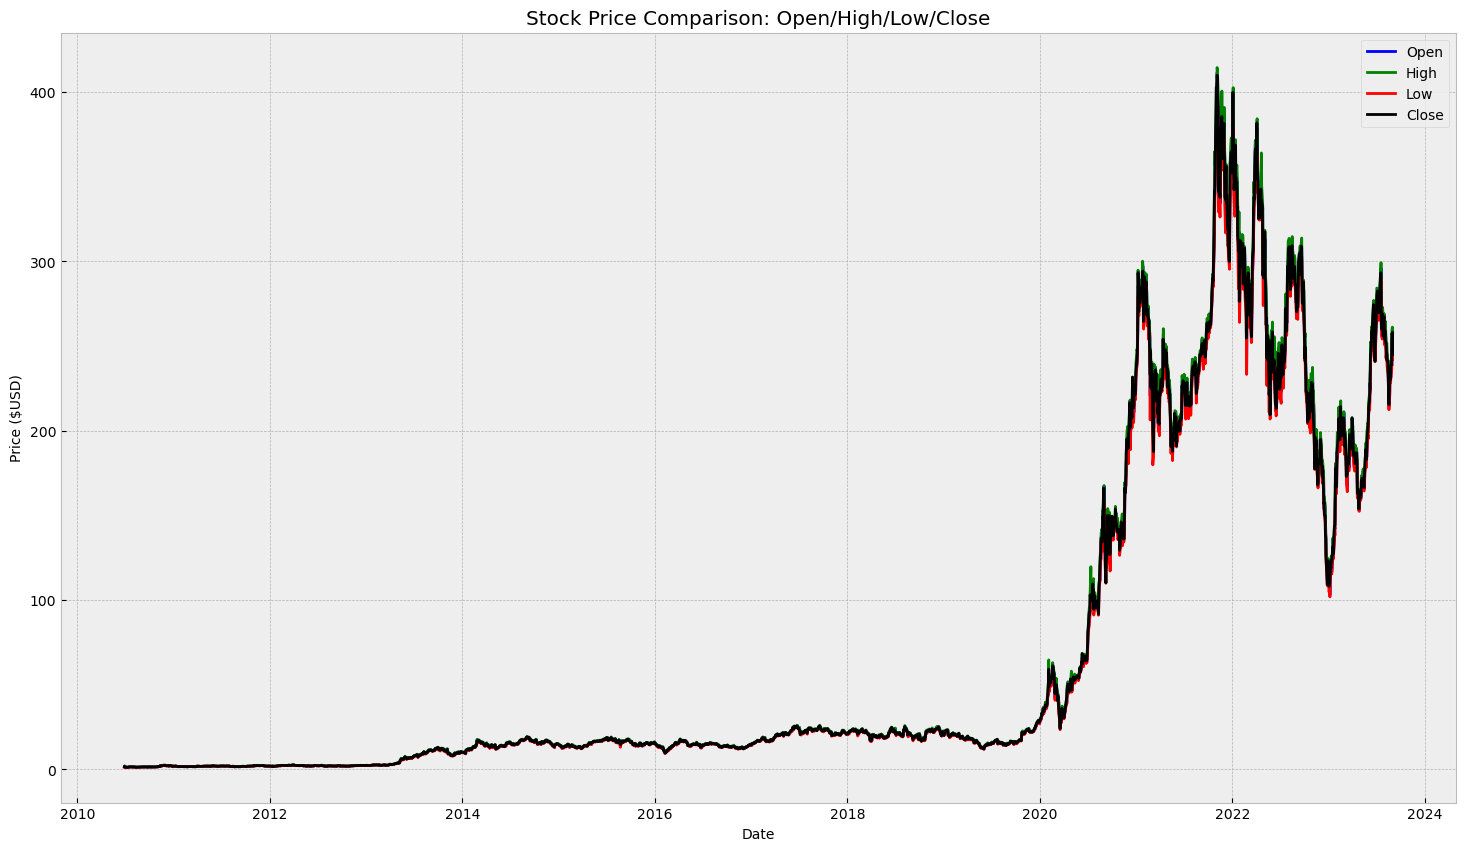

In [ ]:
# plot all stock price features on one graph
plt.figure(figsize=(18,10))
plt.plot(hist_tsla['Open'], c='blue', label='Open')
plt.plot(hist_tsla['High'], c='green', label='High')
plt.plot(hist_tsla['Low'], c='red', label='Low')
plt.plot(hist_tsla['Close'], c='black', label='Close')

plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.title('Stock Price Comparison: Open/High/Low/Close')
plt.legend()
plt.show()

The prices overlap almost completely, which was anticipated.

In [ ]:
# drop the columns that do not provide any relevant information
hist_tsla.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [ ]:
hist_tsla.head()

,Open,High,Low,Close,Volume,date
Date,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,2010-06-29
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,2010-06-30
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,2010-07-01
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,2010-07-02
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,2010-07-06


In [ ]:
# reset the index to be the date column, easier format to read 'YYYY-MM-DD' -- we do not need the hours or seconds of the stock
hist_tsla = hist_tsla.set_index('date')
hist_tsla.head()

,Open,High,Low,Close,Volume
date,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


## Cleaning - Missing Values and Dates

We will need to check if there are any dates missing from our index. We can construct the full date range between our first and last observation date and see the difference with our index:
- utilize `.date_range()`function -- Creates a full range based on the calender, you can choose what frequency to count by, in this situation we used daily.
- and `.difference()` function -- checks the difference between to sets of ranges -- in this case the index date for TSLA and the full calender range from the first day of trading to the last (present).

In [ ]:
first_day = hist_tsla.index.min()
last_day = hist_tsla.index.max()
full_range = pd.date_range(start=first_day, end=last_day, freq="D")
full_range.difference(hist_tsla.index)

DatetimeIndex(['2010-07-03', '2010-07-04', '2010-07-05', '2010-07-10',
               '2010-07-11', '2010-07-17', '2010-07-18', '2010-07-24',
               '2010-07-25', '2010-07-31',
               ...
               '2023-07-29', '2023-07-30', '2023-08-05', '2023-08-06',
               '2023-08-12', '2023-08-13', '2023-08-19', '2023-08-20',
               '2023-08-26', '2023-08-27'],
              dtype='datetime64[ns]', length=1495, freq=None)

We can see that there are 1,485 missing dates from June 29, 2010 to present. This makes sense as trading days are Monday to Friday, excluding holidays. This means that the 1,485 missing dates refer to weekends and holidays.

We will need to fill these dates in such that we have a constant flow of data for the entire calender year. When we include all dates (weekends, holidays) we will have a lot of null values. There are several methods to fill this missing data -- forward fill, backward fill, and interpolation.

- forward fill utilizes the last valid column value (previous day stock price/sales volume)
- backward fill utilizes the following valid column value (the following day price/volume)
- interpolation data between the last and following values

For stocks the best approach is forward fill. This is what is observed traditionally in the stock market. When trading day closes (Friday) the price at closing market is the price utilized for opening market on Monday.

In [ ]:
# are there any null values in the data
hist_tsla.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

We see no null values. This means when we include the entire date range, we should see 1,485 null values.

In [ ]:
# we will be including all missing dates, lets make a copy of the original data set such that no changes are reflected, until we know it works.
hist_tsla_date = hist_tsla.copy()

In [ ]:
# reset the index on the full date range
hist_tsla_date = hist_tsla_date.reindex(full_range)

In [ ]:
# we should see a lot more null values now
hist_tsla_date.isnull().sum()

Open      1495
High      1495
Low       1495
Close     1495
Volume    1495
dtype: int64

In [ ]:
print(f"Null values occupy {round(hist_tsla_date.isnull().sum()[1]/hist_tsla_date.shape[0]*100,2)}% of the entire data set.")

Null values occupy 31.06% of the entire data set.


We can see that the null values occupy a lot of the data set -- we will complete the forward fill method. Forward fill is used because we want to fill in the stocks from the previous day, not the future date.

In [ ]:
# forward fill null values -- use .fillna(method = 'ffill') (ffill = forward fill)
hist_tsla_date = hist_tsla_date.fillna(method='ffill')

In [ ]:
# no more nulls
hist_tsla_date.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
# new shape, how many rows and col
hist_tsla_date.shape

(4813, 5)

The forward fill was successful, there are no more missing values in the data set. Additionally our dataset has increased. This increase is based on the current date the information is pulled.
We can now make these changes to the original dataset.

In [ ]:
# now we can set the original data set to the new cleaned dataset with the full date range.
hist_tsla = hist_tsla_date

In [ ]:
# just to verify the cleaned data set was correctly copied.
display(hist_tsla.shape)
display(hist_tsla.isnull().sum().sum())

(4813, 5)

0

### Create Year, Month, Day columns

In [ ]:
# create Year, Month and Day columns. This will make it easy to refer to certain years, etc.
hist_tsla['Year'] = hist_tsla.index.year
hist_tsla['Month'] = hist_tsla.index.month
hist_tsla['Day'] = hist_tsla.index.day

hist_tsla.head()

,Open,High,Low,Close,Volume,Year,Month,Day
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500.0,2010,6,29
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500.0,2010,6,30
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000.0,2010,7,1
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000.0,2010,7,2
2010-07-03,1.533333,1.540000,1.247333,1.280000,77097000.0,2010,7,3


In [ ]:
# check to see if there are any duplicated rows
display(hist_tsla.duplicated().sum())

# check to see if there are any duplicated columns
display(hist_tsla.T.duplicated().sum())

0

0

---

## Monthly data EDA

We need to break the data into bite size pieces per month. This can be completed by using the groupby method. Group by year and month.

In [ ]:
# group the data by year and month to get the volume of sales per year per month
month_vol = hist_tsla.groupby(['Year', 'Month'])[['Volume']].sum()
month_vol

Volume
Year Month              
2010 6      5.393010e+08
     7      1.426096e+09
     8      2.935215e+08
     9      3.551655e+08
     10     1.459740e+08
...                  ...
2023 5      3.970264e+09
     6      5.024360e+09
     7      3.748048e+09
     8      3.382651e+09
     9      1.322725e+08

[160 rows x 1 columns]

In [ ]:
month_vol.index

MultiIndex([(2010,  6),
            (2010,  7),
            (2010,  8),
            (2010,  9),
            (2010, 10),
            (2010, 11),
            (2010, 12),
            (2011,  1),
            (2011,  2),
            (2011,  3),
            ...
            (2022, 12),
            (2023,  1),
            (2023,  2),
            (2023,  3),
            (2023,  4),
            (2023,  5),
            (2023,  6),
            (2023,  7),
            (2023,  8),
            (2023,  9)],
           names=['Year', 'Month'], length=160)

We can see that the index is not a tuple, this is called multiindex. We need to digest this into something that is easier for the computer to read.

In [ ]:
# use the reset_index(level) method to extend the multiindex tuple to individual columns
month_vol.reset_index(level=[0,1], inplace=True)
month_vol

,Year,Month,Volume
0,2010,6,5.393010e+08
1,2010,7,1.426096e+09
2,2010,8,2.935215e+08
3,2010,9,3.551655e+08
4,2010,10,1.459740e+08
...,...,...,...
155,2023,5,3.970264e+09
156,2023,6,5.024360e+09
157,2023,7,3.748048e+09
158,2023,8,3.382651e+09


In [ ]:
# need to create a datetime col to use as a variale within our plot
# need to include an arbritrary day as the format for the datetime is YYYY-MM-DD, just use 01
month_vol['date'] = pd.to_datetime(dict(year=month_vol['Year'], month=month_vol['Month'], day=1))
month_vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    160 non-null    int64         
 1   Month   160 non-null    int64         
 2   Volume  160 non-null    float64       
 3   date    160 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.1 KB


In [ ]:
# plot an interactive plotly graph for the monthly volume distribution
fig = px.line(month_vol, x=month_vol.date, y="Volume")

fig.update_layout(
    yaxis_title="Sales (billions)",
    xaxis_title="",
    legend_title="",
    title="Monthly Sales TSLA Stock"
)
fig.show()

There is no real trend when analysing the monthly distribution of sales. We can see that its fairly flat until you see the spikes, then we see a gradual drop. Even the drops are at different rates. Maybe there is more infomation stored within the average sales per month.

In [ ]:
# Compute monthly averages of sales, regardless of the year
# monthly average
monthly_mean = month_vol.groupby(month_vol['Month'])[['Volume']].mean()
# monthly_mean

# relative deviation from the overall mean
monthly_mean_diff = (monthly_mean - monthly_mean.mean())/monthly_mean
# monthly_mean_diff

In [ ]:
# plot interactive plotly bar graph
fig = px.bar(monthly_mean_diff)

fig.update_layout(
    yaxis_title="",
    yaxis_tickformat = '.0%', # percentage ticks,
    xaxis = dict(tickmode = 'array', tickvals = [1,2,3,4,5,6,7,8,9,10,11,12], ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
    xaxis_title="",
    title="Average Percent Change in Sales TSLA, since 2010",
    showlegend=False,
)
fig.show()

Insights we can pull from the above graph is that we see more sales in the first half of the year, on average. Peaks in May (16% gain on average) and  weakest is September (20% loss on average).

Even the S&P 500 has seen September being the weakest month since 1945, with the strongest month being April -  [Investopedia](https://www.investopedia.com/term-of-the-week-september-effect-7964565#:~:text=September%20usually%20has%20been%20the,a%201.6%25%20gain%20on%20average.)

This trend is very similar to what is seen above.

We can compute the same analysis for the closing price, and see how the closing price changes over the months on average.

In [ ]:
# group the data by year and month to get the closing price per year per month
month_price = hist_tsla.groupby(['Year', 'Month'])[['Close']].sum()
# month_price

In [ ]:
# reset the index
month_price.reset_index(level=[0,1], inplace=True)
month_price

,Year,Month,Close
0,2010,6,3.181334
1,2010,7,40.461332
2,2010,8,40.173331
3,2010,9,41.313334
4,2010,10,42.882663
...,...,...,...
155,2023,5,5483.449951
156,2023,6,7379.460022
157,2023,7,8438.009964
158,2023,8,7474.839981


In [ ]:
# create a data col with the format yyyy-mm-dd - use an arbritrary day (1)
month_price['date'] = pd.to_datetime(dict(year=month_price['Year'], month=month_price['Month'], day=1))
month_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    160 non-null    int64         
 1   Month   160 non-null    int64         
 2   Close   160 non-null    float64       
 3   date    160 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.1 KB


In [ ]:
# Compute monthly averages closing prices, regardless of the year
# monthly average
month_mean = month_price.groupby(month_price['Month'])[['Close']].mean()
# monthly_mean

# relative deviation from the overall mean
month_mean_diff = (month_mean - month_mean.mean())/month_mean
# monthly_mean_diff

In [ ]:
# plot interactive plotly bar graph
fig = px.bar(month_mean_diff)

fig.update_layout(
    yaxis_title="",
    yaxis_tickformat = '.0%', # percentage ticks,
    xaxis = dict(tickmode = 'array', tickvals = [1,2,3,4,5,6,7,8,9,10,11,12], ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
    xaxis_title="",
    title="Average Percent Change in Closing Price TSLA, since 2010",
    showlegend=False,
)
fig.show()

We can see that the average closing price sees the greatest gains in January, April, July and August (4%-11% gain -- August sees the highest gain). We see the biggest losses in June, September and October (7%-15% loss -- September sees the largest loss). Possibly peak pricing in summer, and then a drop off due to return to school. September loss also correlates to the number of sales - we saw above that September was the weakest month for volume of sales.

---

## Time Series Analysis

In [ ]:
# visualize the closing price for TSLA after including the full range (dates)
fig = px.line(hist_tsla, x=hist_tsla.index, y="Close")
fig.update_layout(
    yaxis_title="Closing Price (USD)",
    xaxis_title="Year",
    legend_title="",
    title="Closing Price for TSLA Stock"
)
fig.show()

### Trend-Seasonal Decomposition

We can extract the trend, seasonality and residual from the data. We are interested in the closing price.\
In order to see the data trends/seasonality it is essential to group the data by a larger scope (i.e. monthly or yearly) -- as TSLA is a relatively new stock, we will group the data into months.

We will utilize the `seasonal_decompose` function in statsmodels.

In [ ]:
# we can group the data in 2 ways -- use the groupby method or the resample. We will use resample with the MS attribute for monthly sample.
# we are only interested in closing price for now.
tsla_monthly_close = hist_tsla[['Close']].resample("MS").sum()
tsla_monthly_close

,Close
2010-06-01,3.181334
2010-07-01,40.461332
2010-08-01,40.173331
2010-09-01,41.313334
2010-10-01,42.882663
...,...
2023-05-01,5483.449951
2023-06-01,7379.460022
2023-07-01,8438.009964
2023-08-01,7474.839981


In [ ]:
# use the seasonal-decompose to decompose the time series
# addative refers to the 3 compositions of the time series (trend, seasonality, residual)

decomp_month = tsa.seasonal_decompose(tsla_monthly_close, model='additive')

In [ ]:
# create the associated columns from the decomposition
tsla_monthly_close["Trend"] = decomp_month.trend
tsla_monthly_close["Seasonality"] = decomp_month.seasonal
tsla_monthly_close["Residual"] = decomp_month.resid

tsla_monthly_close.head(10)

,Close,Trend,Seasonality,Residual
2010-06-01,3.181334,NaN,-275.258238,NaN
2010-07-01,40.461332,NaN,-87.884428,NaN
2010-08-01,40.173331,NaN,93.707803,NaN
2010-09-01,41.313334,NaN,58.904296,NaN
2010-10-01,42.882663,NaN,39.223885,NaN
2010-11-01,59.101999,NaN,98.696207,NaN
2010-12-01,63.024000,47.662361,89.513533,-74.151894
2011-01-01,52.930003,50.623389,144.927568,-142.620953
2011-02-01,43.567999,51.838750,-32.245988,23.975236
2011-03-01,48.984003,52.611028,2.641000,-6.268025


In [ ]:
# plot the trend, seasonality and residual data
columns = ["Trend", "Seasonality", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(
        go.Scatter(x=tsla_monthly_close.index, y=tsla_monthly_close[col]),
        row=i+1,
        col=1,
    )

fig.update_layout(
    height=800,
    width=1000,
    showlegend=False,
    xaxis_title='Date'
)

fig.show()

***Key Insights:***
- We can see an exponential trend upwards post 2019, and then a decline post 2022.
- Seasonality - we can see that there is a spike in prices in January.
- Residual - we can see some seasonality in the residuals from 2010 to 2020. After 2020 we see a drastic change.
- We see multiple spikes in prices in 2021 and some in 2022 -- opposing this increase we see a large drop off in 2023
    - The spikes in 2021 can be related to Tesla delivering almost double the vehicles compared to 2020 (Model 3 and Y deliveries reached over 911,000 vs 500,000 in 2020) -- this is impressive even with the chip shortages due to COVID; [Reference: Market Watch](https://www.marketwatch.com/story/tesla-smashes-quarterly-delivery-record-sees-sales-surge-87-in-2021-11641150700)
    - drop off due to Elon Musk's procurement of Twitter, along with his selling of stocks
    - Drop off as well as the production losses from China due to lock-downs -- Tesla was only able to deliver 40% of vehicles this quarter. [Reference: Reuters](https://www.reuters.com/business/autos-transportation/tesla-shares-start-2023-lower-worries-over-weak-demand-logistical-issues-2023-01-03/)

***Note:*** The trend component of the time series is based on a rolling average, therefore we anticipate to see null values at the beginning of the dataset.

## Data Analysis for the time frame presented in Book 1, based on Reddit data (1 year; July 2021 to July 2022)

Based on the Reddit data that was cleaned in `Book 1`, we are interested in a time frame of July 22, 2021 to July 21, 2022. We can filter the historical stock data to match this time frame, and analyze the prices.

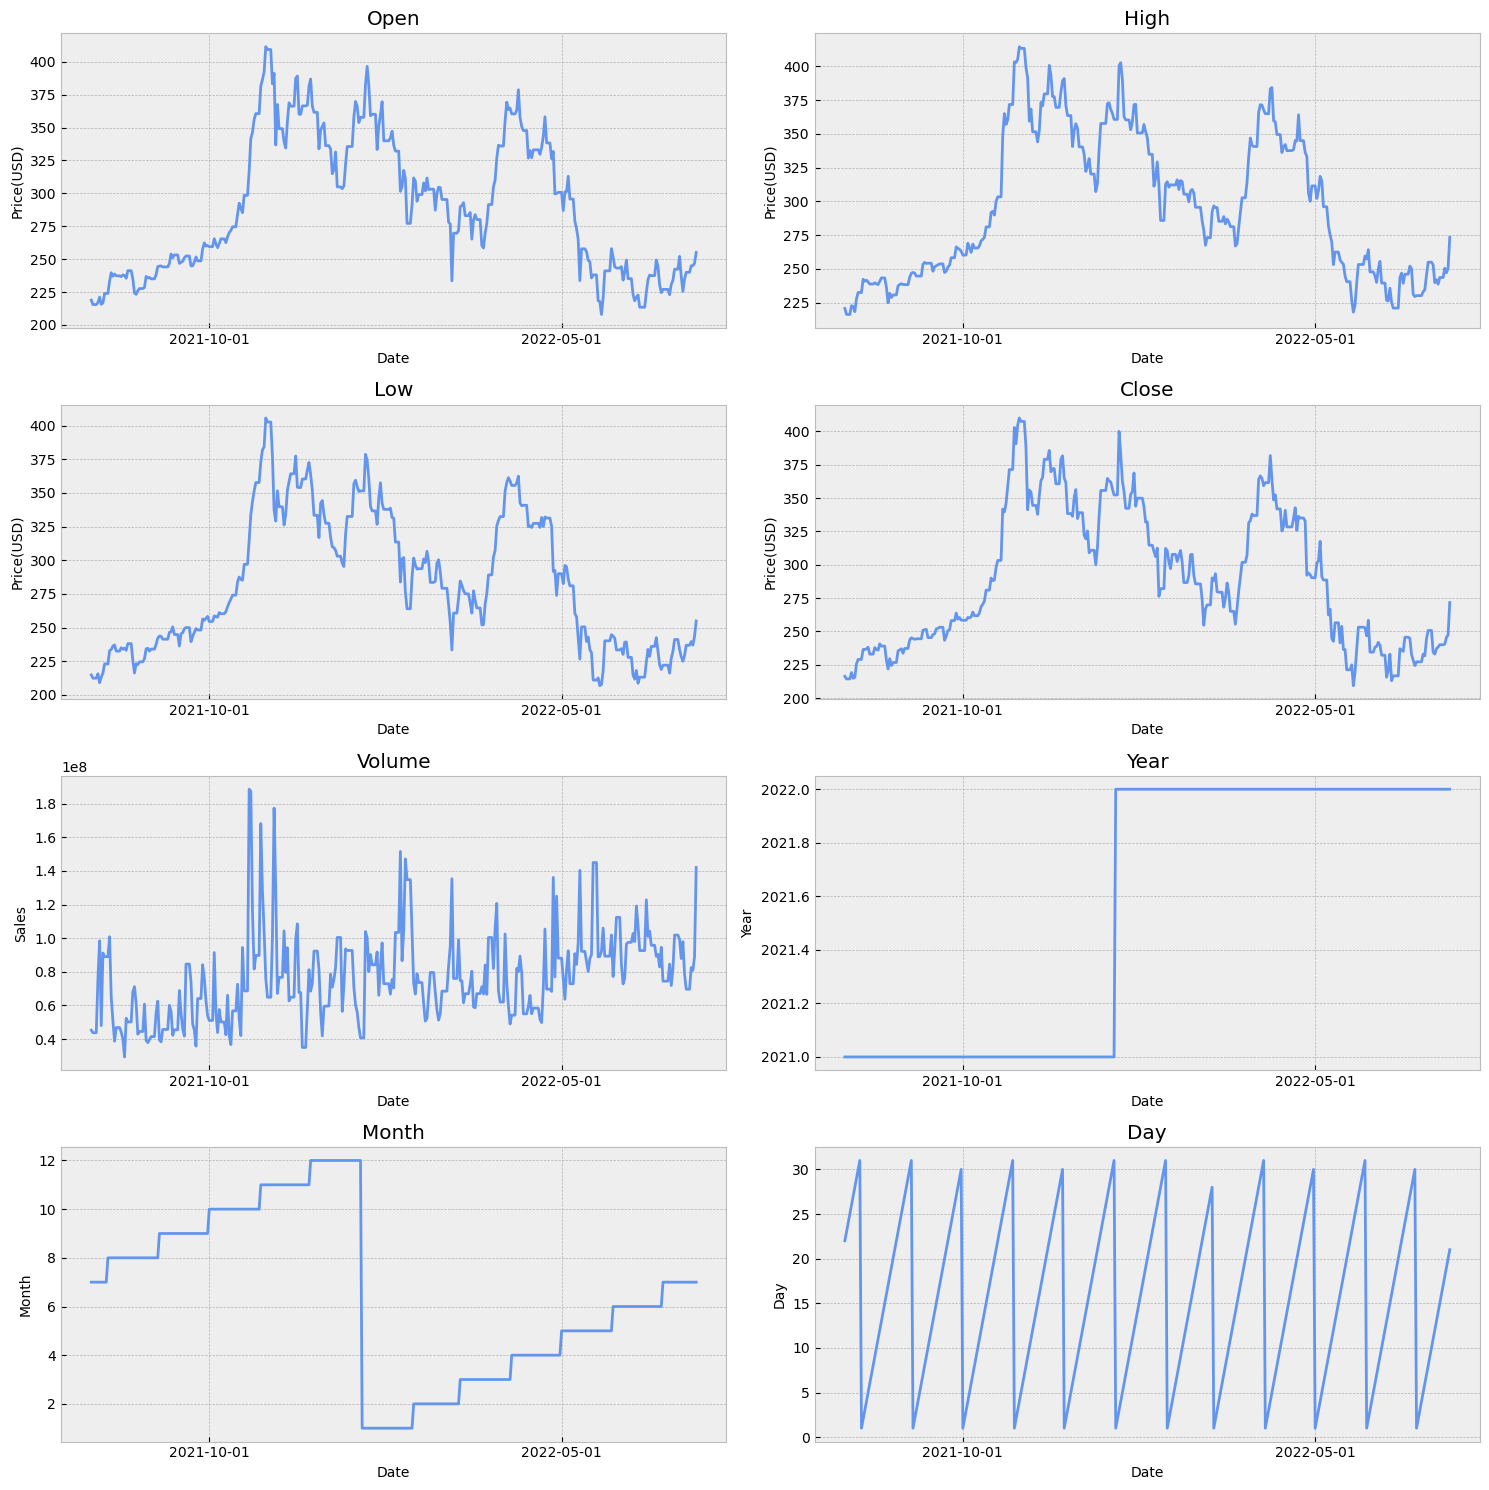

In [ ]:
# just a quick check to filter the data frame to only include the 1 year worth of stock info (2021-Jul to 2022-Jul)
temp = hist_tsla['2021-07-22':'2022-07-21'].copy()
col_list = list(temp.columns)
plt.subplots(4,2,figsize=(15,15))

# plot each feature in the data frame, for this filtered dataset
for i, column in enumerate(col_list):
    plt.subplot(4,2,i+1)
    plt.plot(temp[column], color="cornflowerblue")
    plt.xticks(['2021-10', '2022-05'])
    plt.xlabel('Date')
    plt.title(column)

    if column in ["Open", "High", "Low", "Close"]:
        plt.ylabel("Price(USD)")
    elif column is "Volume":
        plt.ylabel('Sales')
    else:
        plt.ylabel(column)

plt.tight_layout()
plt.show()

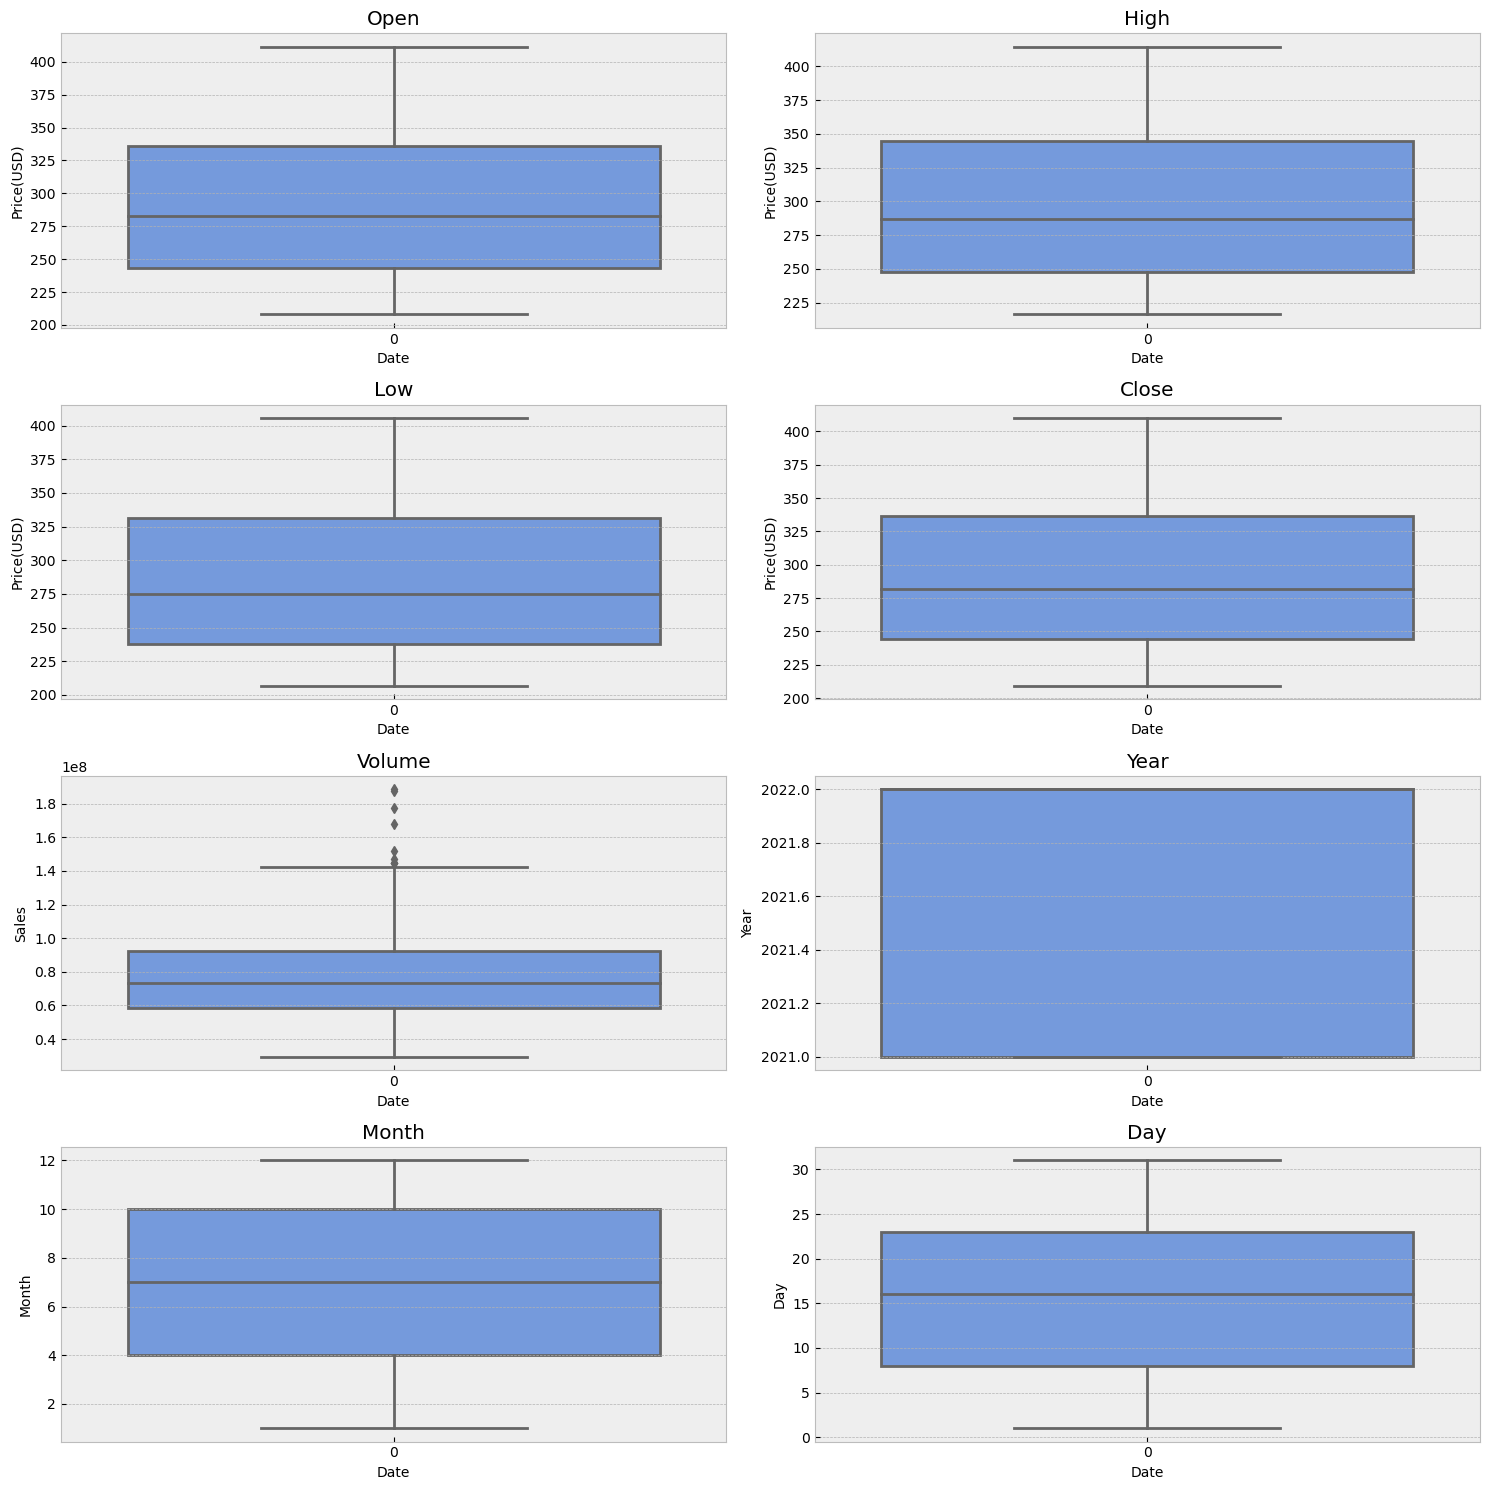

In [ ]:
# just a quick check to filter the data frame to only include the 1 year worth of stock info (2021-Jul to 2022-Jul)
temp = hist_tsla['2021-07-22':'2022-07-21'].copy()
col_list = list(temp.columns)
plt.subplots(4,2,figsize=(15,15))

# plot each feature in the data frame, for this filtered dataset
for i, column in enumerate(col_list):
    plt.subplot(4,2,i+1)
    sns.boxplot(temp[column], color="cornflowerblue")
    plt.xlabel('Date')
    plt.title(column)

    if column in ["Open", "High", "Low", "Close"]:
        plt.ylabel("Price(USD)")
    elif column is "Volume":
        plt.ylabel('Sales')
    else:
        plt.ylabel(column)

plt.tight_layout()
plt.show()

After filtering the data, we see that the distribution looks more aligned with a normal distribution.

In [ ]:
# how many rows, should be 365 for 1 year of data
temp.shape

(365, 8)

The temporary data frame is for 1 full year of stock information (2021-Jul to 2022-Jul). We see that the data frame has 365 records.

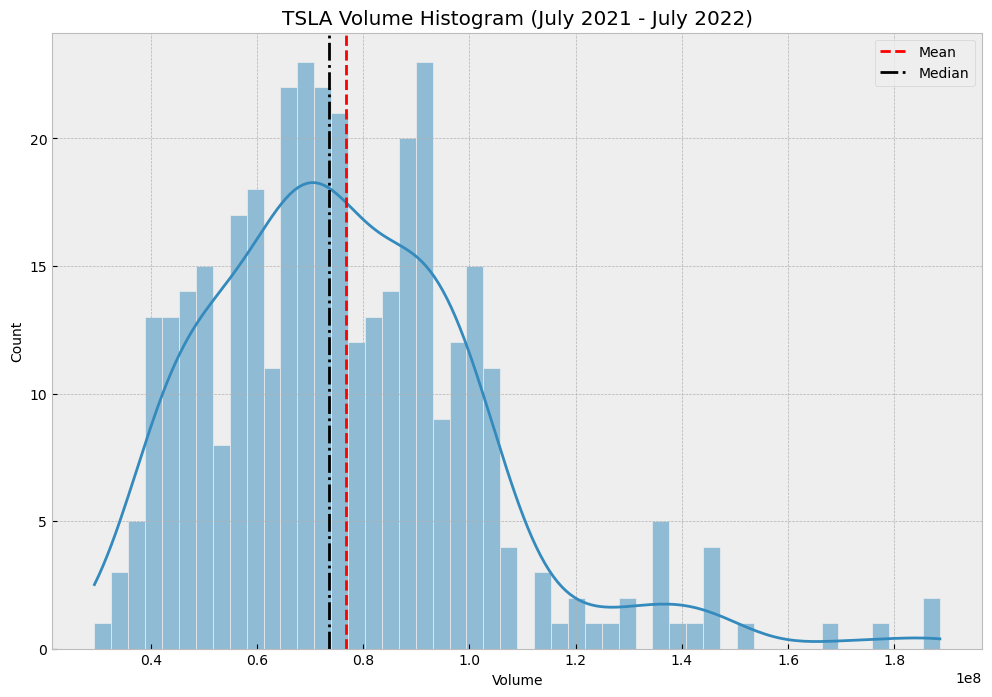

In [ ]:
# plot the distribution histogram -- for the filtered data
temp = hist_tsla['2021-07-22':'2022-07-21'].copy()

# plot the histogram for the volume within the timeframe above

plt.figure(figsize=(12,8))

# kde computes a density estimate to smooth the distributuion ans dhow on the same plot
sns.histplot(data = temp['Volume'], bins=50, alpha=0.5, kde=True)
plt.axvline(temp['Volume'].mean(), color="red", ls='--', label='Mean')
plt.axvline(temp['Volume'].median(), color="black", ls='-.', label='Median')

plt.title("TSLA Volume Histogram (July 2021 - July 2022)")
plt.legend()
plt.show()

The histogram for the filtered data (2021-2022) is closer to what a normal distribution would look like, with some outliers. This is good insight as we know that the data is more scaled when we compute the modeling.

## Baseline

We can establish a baseline for movement in the stock by determining how the stock has moved in relation to the previous trading day. To begin we will need to create a column that states 'Previous_day's' closing price (this will be completed using the `.shift(1)` to shift the data down one row).

In [ ]:
# feature engineer the previous day price and sales
hist_tsla['Previous_Close'] = hist_tsla['Close'].shift(1)
hist_tsla['Previous_Vol'] = hist_tsla['Volume'].shift(1)

Since we shifted the data, we know that there will be a null value at the beginning of the data set. To eliminate the Null we can use the `fillna(bfill)` method. This will back fill the data to use the following days data -- we can also delete the row as it is only 1 null value. For now we will fill the null, because within our feature engineered data we will need to remove this anyways (for rolling averages).

In [ ]:
# check to see how many nulls in the dataset
hist_tsla.isnull().sum().sum()

2

In [ ]:
# Are there any null values -- there will be since we shifted the data
hist_tsla.isnull().sum()

Open              0
High              0
Low               0
Close             0
Volume            0
Year              0
Month             0
Day               0
Previous_Close    1
Previous_Vol      1
dtype: int64

There are 2 Null values in the data set. The are in the `Previous_Close` and `Previous_Vol`.

In [ ]:
# forward fill the missing data
hist_tsla.fillna(method='bfill', inplace=True)

In [ ]:
# which columns contain null values
hist_tsla.isnull().sum()

Open              0
High              0
Low               0
Close             0
Volume            0
Year              0
Month             0
Day               0
Previous_Close    0
Previous_Vol      0
dtype: int64

In [ ]:
# create a new column that caluclates the price movement from yesterday to today
hist_tsla['Price_Movement'] = hist_tsla['Close'] - hist_tsla['Previous_Close']

In [ ]:
hist_tsla.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Previous_Close,Previous_Vol,Price_Movement
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500.0,2010,6,29,1.592667,281494500.0,0.000000
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500.0,2010,6,30,1.592667,281494500.0,-0.004000
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000.0,2010,7,1,1.588667,257806500.0,-0.124667
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000.0,2010,7,2,1.464000,123282000.0,-0.184000
2010-07-03,1.533333,1.540000,1.247333,1.280000,77097000.0,2010,7,3,1.280000,77097000.0,0.000000


In [ ]:
# Organize the stock movement from stock rise, stock decline and no movement days
hist_tsla['Price_Movement'] = np.where(hist_tsla['Price_Movement'] <0, -1, np.where(hist_tsla['Price_Movement'] >0, 1, 0))

In [ ]:
hist_tsla.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Previous_Close,Previous_Vol,Price_Movement
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500.0,2010,6,29,1.592667,281494500.0,0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500.0,2010,6,30,1.592667,281494500.0,-1
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000.0,2010,7,1,1.588667,257806500.0,-1
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000.0,2010,7,2,1.464000,123282000.0,-1
2010-07-03,1.533333,1.540000,1.247333,1.280000,77097000.0,2010,7,3,1.280000,77097000.0,0


In [ ]:
# filter to see how many no movements days are in the data set, save to a variable
no_mvmt = hist_tsla.loc[hist_tsla['Price_Movement']==0].count()[0]
no_mvmt

1506

In [ ]:
# create a column that takes what day of the week it is
hist_tsla['weekday'] = hist_tsla.index.weekday

Add in a column to determine which day of the week the trade was made. This will help when we determine the no movement days, and if they are related to the weekends and holidays (as these are stock market closed days).

Where:
- 0 is Monday
- 1 is Tuesday
- 2 is Wednesday
- 3 is Thursday
- 4 is Friday
- 5 is Saturday
- 6 is Sunday

We need to get a better understanding as to how many of the 0 movement days are over the weekend. This will be completed by filtering the data for `Weekday` 5 and 6. This is because we are calculating the movement as Sunday-Saturday and Monday-Sunday (these are stored under 5 and 6 respectively).

In [ ]:
# query the data to only seperate the weekend info (Weekday = 5 or 6)
hist_tsla.query("weekday==5 or weekday==6")[['weekday']].count()

weekday    1374
dtype: int64

In [ ]:
# How many weekend no movement days there are, to compare with the overall no movemet number from above
temp = hist_tsla.query("weekday==5 or weekday==6")[['weekday', 'Price_Movement']]

weekend_no_mvmt = temp.loc[temp['Price_Movement'] == 0]['Price_Movement'].count()
weekend_no_mvmt

1374

We can see that there is 1374 price movements that occurred on the Weekends (Saturday and Sunday) when the stock market is closed.

In [ ]:
# calculate the precentage of non-movement days
print(f"The percentage of no price movement days that are not Saturday or Sunday is {round((no_mvmt-weekend_no_mvmt)/no_mvmt*100, 2)}%")

The percentage of no price movement days that are not Saturday or Sunday is 8.76%


The low no price movement day percentage that falls outside of the weekend can be due to holidays.

In [ ]:
# filter the data to not include the weekends and only the no price movement days
non_wknd_no_mvmt = hist_tsla.query("(weekday!=5 and weekday!=6) and Price_Movement==0")
non_wknd_no_mvmt

,Open,High,Low,Close,Volume,Year,Month,Day,Previous_Close,Previous_Vol,Price_Movement,weekday
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500.0,2010,6,29,1.592667,281494500.0,0,1
2010-07-05,1.533333,1.540000,1.247333,1.280000,77097000.0,2010,7,5,1.280000,77097000.0,0,0
2010-09-06,1.391333,1.420000,1.377333,1.403333,6519000.0,2010,9,6,1.403333,6519000.0,0,0
2010-10-08,1.362000,1.386000,1.359333,1.362000,4017000.0,2010,10,8,1.362000,2115000.0,0,4
2010-10-12,1.346667,1.352000,1.335333,1.349333,3660000.0,2010,10,12,1.349333,2568000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20,199.990005,208.440002,197.500000,208.309998,213738500.0,2023,2,20,208.309998,213738500.0,0,0
2023-04-07,183.080002,186.389999,179.740005,185.059998,123857900.0,2023,4,7,185.059998,123857900.0,0,4
2023-05-29,184.619995,198.600006,184.529999,193.169998,162061500.0,2023,5,29,193.169998,162061500.0,0,0
2023-06-19,258.920013,263.600006,257.209991,260.540009,167563700.0,2023,6,19,260.540009,167563700.0,0,0


In [ ]:
# typically long weekends (holidays) fall on either a Monday (0) or Friday (4)
holiday = non_wknd_no_mvmt.query("weekday==0 or weekday==4").count()[0]
holiday

95

In [ ]:
# calculate the percentage of no price movement days that are holidays
print(f"The percentage of no price movement days that fall on a holiday is {round((holiday/non_wknd_no_mvmt.count()[0])*100,2)}%.")

The percentage of no price movement days that fall on a holiday is 71.97%.


From the above query it is safe to state that majority of the no price movement days that are not a Saturday/Sunday fall on a holiday. Therefore for our baseline we will eliminate all no price movement days as majority are non-trading days.

***Assumption: All no price movement days that fall on a Friday or Monday are holidays (holidays the stock market is closed, thus no trade day).***

In [ ]:
# how many up and down trends we see in the price movement
hist_tsla.query("Price_Movement != 0")[['Price_Movement']].value_counts()

Price_Movement
 1                1718
-1                1589
dtype: int64

In [ ]:
# normalize the counts to get an overall percentage.
hist_tsla.query("Price_Movement != 0")[['Price_Movement']].value_counts(normalize=True)

Price_Movement
 1                0.519504
-1                0.480496
dtype: float64

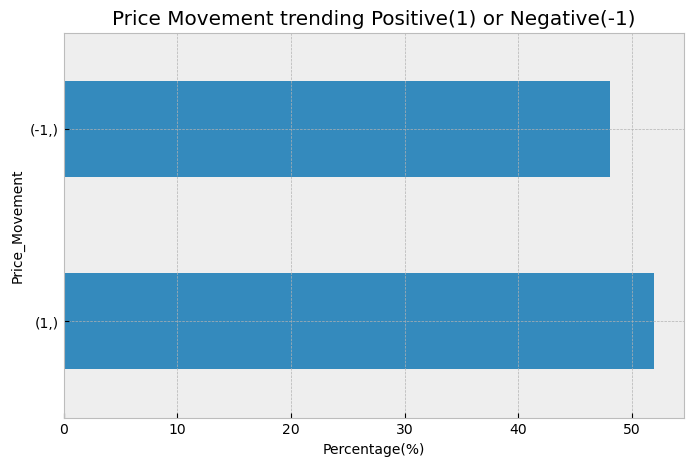

In [ ]:
# plot the upward and downward trend split
plt.figure(figsize=(8,5))
(hist_tsla.query("Price_Movement != 0")[['Price_Movement']].value_counts(normalize=True)*100).plot(kind='barh')
plt.title('Price Movement trending Positive(1) or Negative(-1)')
plt.xlabel('Percentage(%)')
plt.show()

We can see that the split is fairly even for upward and downward trends within the TSLA stock CLosing price movement. We see roughly 52% upward trend and 48% downward. This takes into account all the stock data from 2010 to present.

Based on this simple observation, we can see that a baseline assumption is that if we predicted the price of TSLA stock to increase tomorrow, we would be 52% accurate in our assumption. Additionally, if we always assumed the stock was going to increase we would be correct 52% of the time.

This is obviously not a great approach, as we would barely make any money in the long term. We will see if our modeling will predict at a greater percentage than this baseline.

## Feature Engineering

We need to analyze specific indicators that will help with our model predictions.

We want to calculate the percent change from the previous close price to the next day close price. This will act as a future predictor on how the stock price is moving from day to day. Mathematically the percent change is calculated by:
- (Tomorrow_Price - Today_Price)/Today_Price * 100

In [ ]:
# calculate the precent change for future predictions and movement of stock price.
# use the built in fucntion .pct_change() to get the precent change to the next day (periods=1)
# shift the data -1 to associate that percent change to the previous day (this will act as a prediction indicator for our analysis)
hist_tsla['Percent_change']= (hist_tsla['Close'].pct_change(periods=1)*100).shift(-1)
hist_tsla['Percent_change'].describe()

count    4812.000000
mean        0.149161
std         2.990355
min       -21.062824
25%        -0.661565
50%         0.000000
75%         1.019953
max        24.395076
Name: Percent_change, dtype: float64

We see that the percent change ranges from -21% to 24%. We can bin this to create a categorical feature, but we will keep it as a continuous variable.

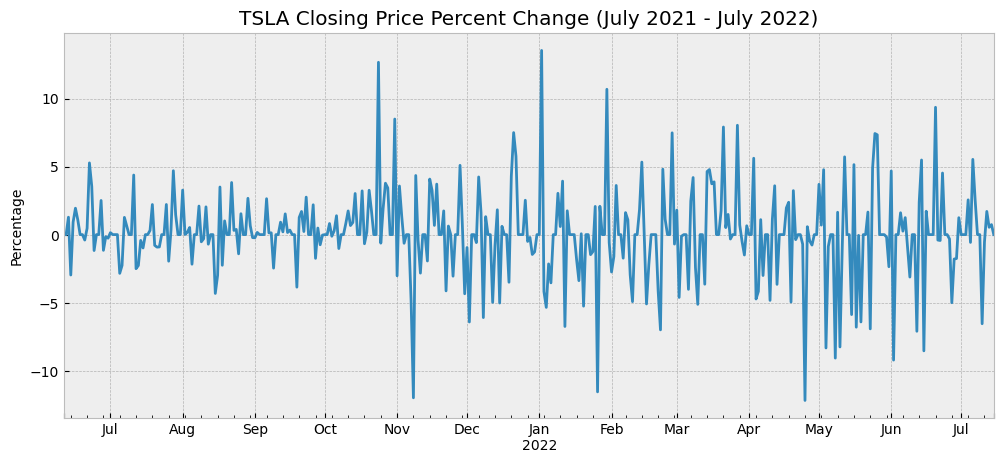

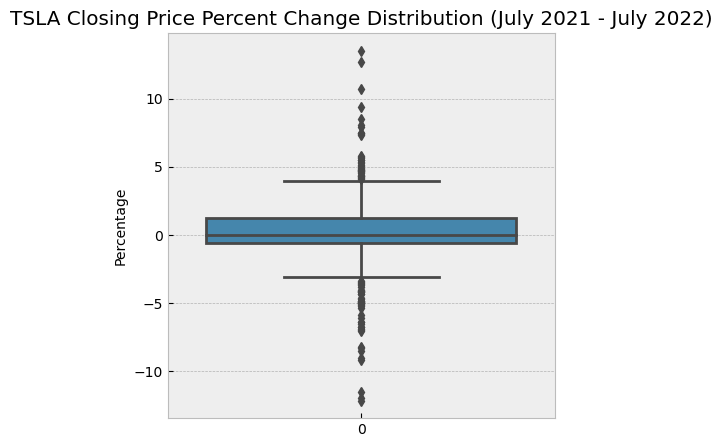

In [ ]:
# plot the percent change dist
plt.figure(figsize=(12,5))
hist_tsla['Percent_change'][4000:4400].plot(kind='line')

plt.title('TSLA Closing Price Percent Change (July 2021 - July 2022)')
plt.ylabel('Percentage')
# plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(hist_tsla['Percent_change'][4000:4400])
plt.title('TSLA Closing Price Percent Change Distribution (July 2021 - July 2022)')
plt.ylabel('Percentage')

plt.show()



We can see that the Percent change over the span of the year (July 2021 to July 2022) follows the normal distribution. We see a lot of fluctuation around the median (0). With peaks in October, December and February.

In [ ]:
hist_tsla.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Previous_Close,Previous_Vol,Price_Movement,weekday,Percent_change
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500.0,2010,6,29,1.592667,281494500.0,0,1,-0.251148
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500.0,2010,6,30,1.592667,281494500.0,-1,2,-7.847274
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000.0,2010,7,1,1.588667,257806500.0,-1,3,-12.568307
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000.0,2010,7,2,1.464000,123282000.0,-1,4,0.000000
2010-07-03,1.533333,1.540000,1.247333,1.280000,77097000.0,2010,7,3,1.280000,77097000.0,0,5,0.000000


In [ ]:
hist_tsla.shape

(4813, 13)

We will need to create several moving averages, we will compute a 5, 20, 100 day moving average. This will be used as a trend visualization. THe moving average is used to smooth out the volatile price index. When computing the moving average we will need to use the `Previous_Close` price, this is because if we use the current day price there will be data leakage.

We will utilize the built in function `.rolling().mean()`

In [ ]:
# calculate the moving averages for the closing price of the TSLA stock
hist_tsla['MA_5'] = hist_tsla['Previous_Close'].rolling(5).mean()
hist_tsla['MA_20'] = hist_tsla['Previous_Close'].rolling(20).mean()
hist_tsla['MA_100'] = hist_tsla['Previous_Close'].rolling(100).mean()

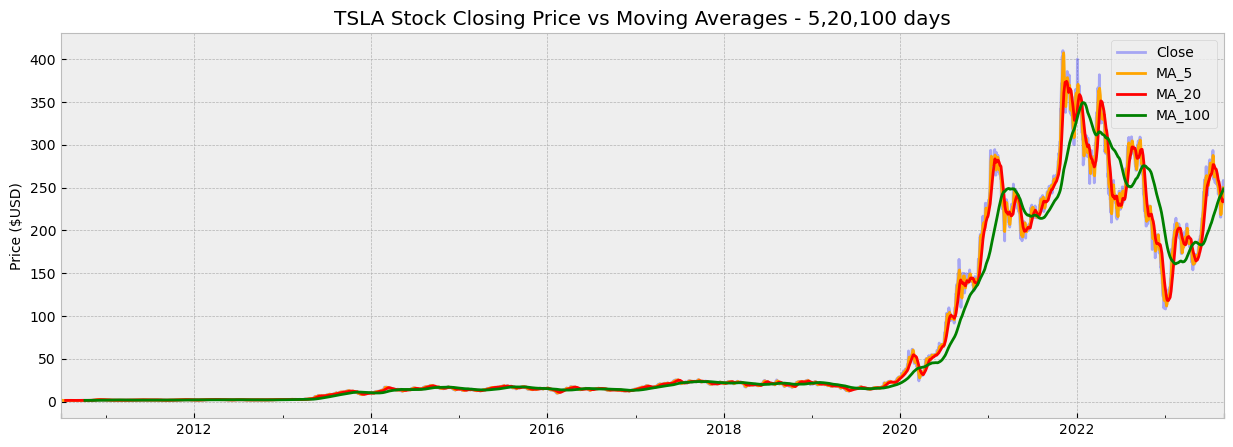

In [ ]:
# plot the closing price as well as the moving averages on a single plot to compare
plt.figure(figsize=(15,5))
hist_tsla['Previous_Close'].plot(kind='line', color='blue',alpha=0.3, label='Close')
hist_tsla['MA_5'].plot(kind='line', color='orange', label='MA_5')
hist_tsla['MA_20'].plot(kind='line', color='red', label='MA_20')
hist_tsla['MA_100'].plot(kind='line', color='green', label='MA_100')

plt.title("TSLA Stock Closing Price vs Moving Averages - 5,20,100 days")
plt.ylabel('Price ($USD)')
plt.legend()
plt.show()

The graph above contains a lot of data, and it is a little hard to analyze what the moving averages may be doing, we will zoom into the data by filtering the index.

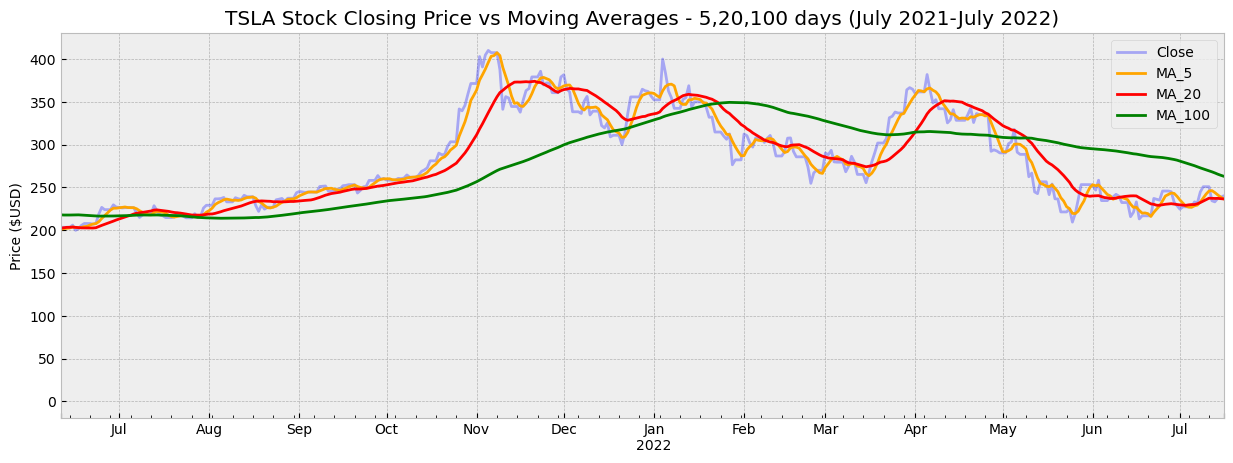

In [ ]:
# plot the closing price as well as the moving averages on a single plot to compare
plt.figure(figsize=(15,5))
hist_tsla['Previous_Close'].plot(kind='line', color='blue',alpha=0.3, label='Close')
hist_tsla['MA_5'].plot(kind='line', color='orange', label='MA_5')
hist_tsla['MA_20'].plot(kind='line', color='red', label='MA_20')
hist_tsla['MA_100'].plot(kind='line', color='green', label='MA_100')

# to get a more zoomed in reference to analyse the moving averages easier -- zoom into July 2021 to July 2022
plt.xlim(hist_tsla.index.values[4000], hist_tsla.index.values[4400])
plt.title("TSLA Stock Closing Price vs Moving Averages - 5,20,100 days (July 2021-July 2022)")
plt.ylabel('Price ($USD)')
plt.legend()
plt.show()

What we can see is that the 5 day moving average follows very closely to the actual closing price of the stock. The 100 day moving average is smooth.

Looking at the moving average lines, you can see that if the stock price is above the moving average you know that the stock price is trending upwards (depending on the scale, can be long term or short term).
You can also compare the moving average plots against one another. Essentially if the short term moving average (5 or 20 day) dips below long term (100 day), that means short-term we are going negative, but long term we are still positive -- this can indicate the stock is about to drop. Alternatively, if the short term goes above the long term line, then there is a chance the stock is about to turn and trend positively.

A better indicator to show this information is MACD (Moving Average Convergence/Divergence), which is a trend following momentum indicator that shows the relationship between two exponential moving averages.

To calculate the MACD signals we use the common lengths of 12, 26 and 9 days. Typically MACD=12 period EMA - 26 period EMA [Investopedia](https://www.investopedia.com/terms/m/macd.asp). MACD line or signal line can be used as an indicator to buy/sell.

In [ ]:
# compute the MACD
def calc_macd(df, len1=12, len2=26, len3=9):
  '''
  Calculate MACD and MACD signal for stock data:
  MACD = 12 day exponential moving average - 26 day exponential moving average
  macd_signal is just the weighted exponential average over 9 day time frame

  Inputs:
  df = stock data frame, column of interest (i.e. closing price) (pandas.DataFrame)
  len1 = 12 day typically (int)
  len2 = 26 day typically (int)
  len3 = 9 day typically (int)

  Output:
  return MACD and macd_signal
  '''
  # compute the short length exponential moving average -- use the built in function .ewm() which provides exponentially weighted calculations
  EMA_12 = df.ewm(span=len1, adjust=False).mean() # adjust=False is becasue there is no adjustment factor or imbalance
  EMA_26 = df.ewm(span=len2, adjust=False).mean()

  # indicate which way the stock is trending
  MACD = EMA_12-EMA_26

  # exponential moving average of the MACD to see how the MACD progresses overtime
  macd_signal = MACD.ewm(span=len3, adjust=False).mean()

  return MACD, macd_signal

In [ ]:
MACD, macd_signal = calc_macd(hist_tsla['Previous_Close'], 12, 26, 9) # common lengths when calculating the MACD is 12, 26 and 9

hist_tsla['MACD'] = MACD
hist_tsla['MACD_signal'] = macd_signal

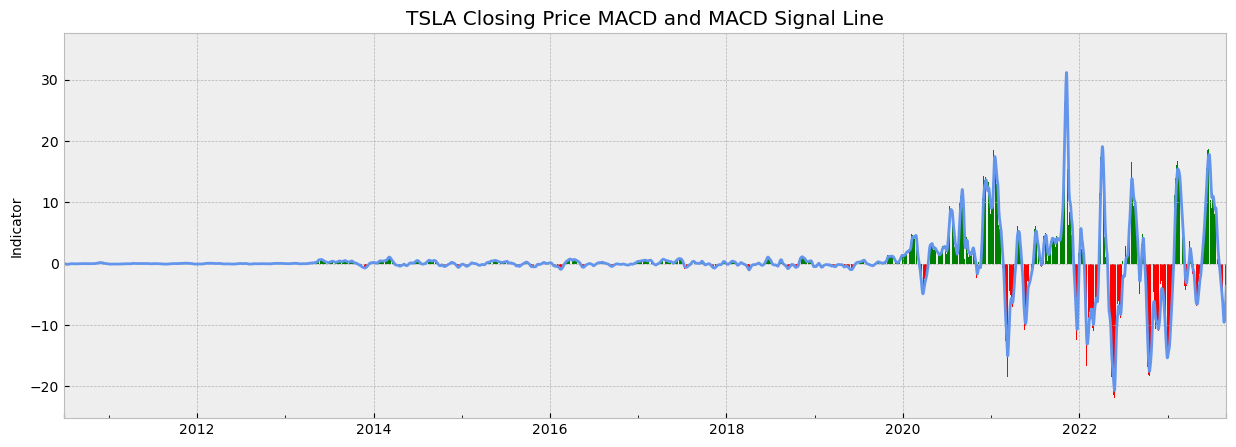

In [ ]:
# plot the MACD bar indicators and the MACD signal
plt.figure(figsize=(15,5))

# associate red with drops and green with rises in the MACD
colors = np.where(hist_tsla['MACD']<0, 'red', 'green')

# plot MACD and signal on one graph
plt.bar(hist_tsla.index.values, hist_tsla['MACD'], color=colors)
hist_tsla['MACD_signal'].plot(kind='line', color='cornflowerblue')

plt.title("TSLA Closing Price MACD and MACD Signal Line")
plt.ylabel('Indicator')
plt.show()

Just as above, this is a lot of information, we can zoom into the same frame as above, and compare the 2 graphs.

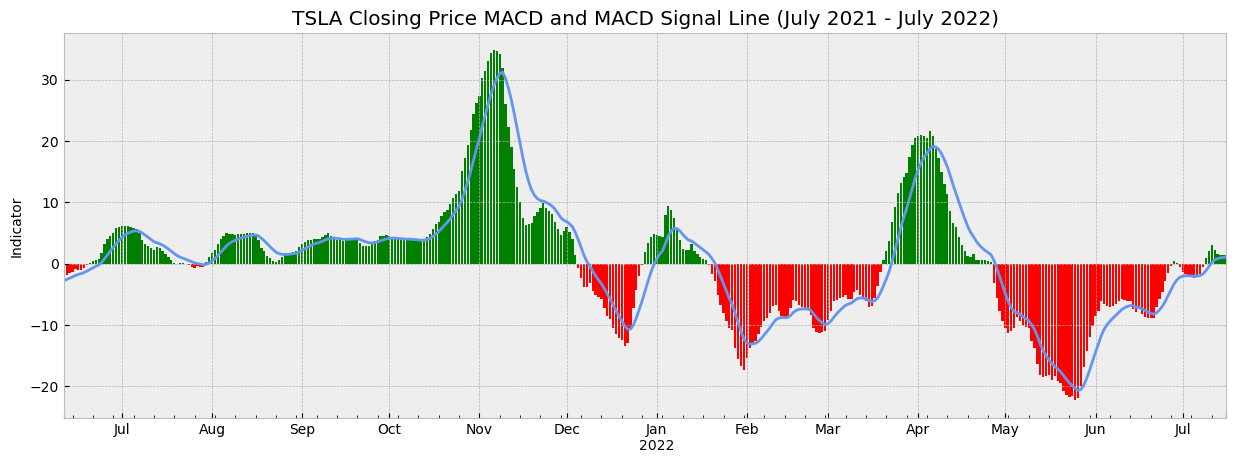

In [ ]:
# plot the MACD bar indicators and the MACD signal
plt.figure(figsize=(15,5))

# associate red with drops and green with rises in the MACD
colors = np.where(hist_tsla['MACD']<0, 'red', 'green')

plt.bar(hist_tsla.index.values, hist_tsla['MACD'], color=colors)
hist_tsla['MACD_signal'].plot(kind='line', color='cornflowerblue')

# to get a more zoomed in reference to analyse the moving averages easier -- zoom into July 2021 to July 2022
plt.xlim(hist_tsla.index.values[4000], hist_tsla.index.values[4400])
plt.title("TSLA Closing Price MACD and MACD Signal Line (July 2021 - July 2022)")
plt.ylabel('Indicator')
plt.show()

From the MACD and the Moving Average graphs above, we can see that these two are correlated. We can see that the trends follow one another.

Another key indicator is Bollinger Bands. These are used to determine entry and exit points for a trade. They indicate if a stock is being overbought or oversold.

Bollinger bands are typically calculated based on the data from the 20 day moving average. We can calculate the upper and lower bands with the calculations below.

- upper band (BOL_U) = MA_20 + 2*stddev(MA_20)
- lower band (BOL_L) = MA_20 - 2*stddev(MA_20)
- middle band is just the 20 day moving average (MA_20)

In [ ]:
# calculate the bollinger bands based on the equations above
def calc_bol(df, days=20):
  '''
  Calculate the bollinger bands upper and lower limits
  upper bollinger = 20 day moving average + 2*(20 day moving average standard deviation)
  lower bollinger = 20 day moving average - 2*(20 day moving average standard deviation)

  Inputs:
  df = dataframe (clasing price)
  days are default set to 20, as typically we calculate the bollinger bands with the 20 day moving average

  Output:
  return the upper and lower bollinger bands dataframes
  '''

  bol_upper = df.rolling(days).mean() + 2*df.rolling(days).std()
  bol_lower = df.rolling(days).mean() - 2*df.rolling(days).std()

  return bol_upper, bol_lower

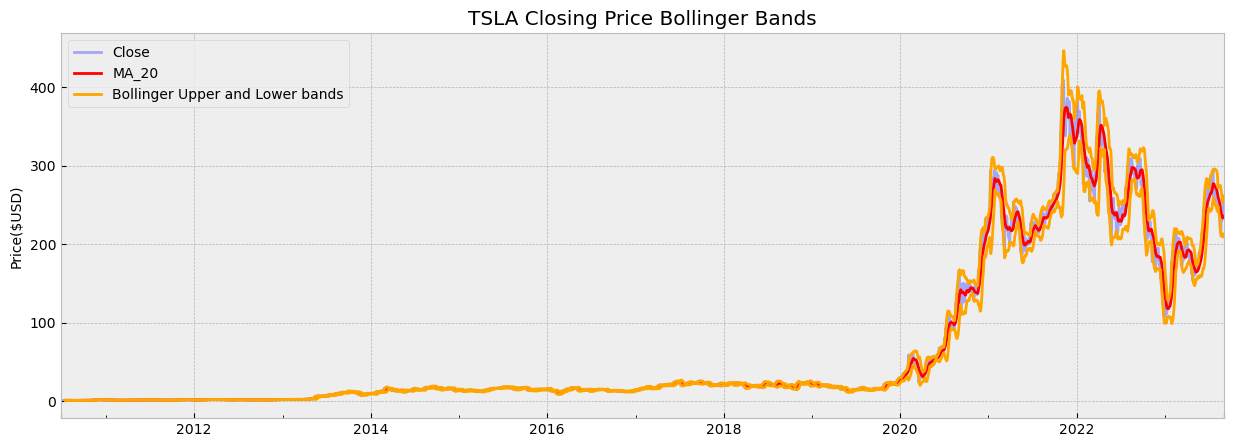

In [ ]:
bol_u, bol_l = calc_bol(hist_tsla['Previous_Close'])

hist_tsla['BOL_U'] = bol_u
hist_tsla['BOL_L'] = bol_l


# plot the closing price, 20 day moving average and the upper and lower bollinger bands.
plt.figure(figsize=(15,5))
hist_tsla['Previous_Close'].plot(kind='line', color='blue',alpha=0.3, label='Close')
hist_tsla['MA_20'].plot(kind='line', color='red', label='MA_20')
hist_tsla['BOL_U'].plot(kind='line', color='orange', label='Bollinger Upper and Lower bands')
hist_tsla['BOL_L'].plot(kind='line', color='orange', label='_')

plt.title('TSLA Closing Price Bollinger Bands')
plt.ylabel("Price($USD)")
plt.legend()
plt.show()

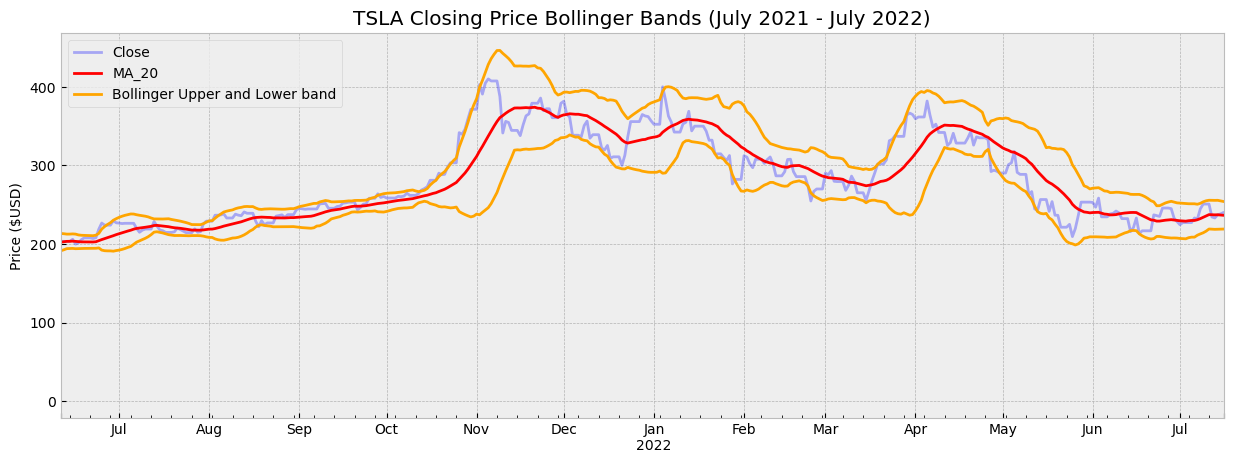

In [ ]:
# plot the closing price, 20 day moving average and the upper and lower bollinger bands.
plt.figure(figsize=(15,5))
hist_tsla['Previous_Close'].plot(kind='line', color='blue',alpha=0.3, label='Close')
hist_tsla['MA_20'].plot(kind='line', color='red', label='MA_20')
hist_tsla['BOL_U'].plot(kind='line', color='orange', label='Bollinger Upper and Lower band')
hist_tsla['BOL_L'].plot(kind='line', color='orange', label='_') # no label needed for this, it is captured as one upper and lower band

# to get a more zoomed in reference to analyse the moving averages easier -- zoom into July 2021 to July 2022
plt.xlim(hist_tsla.index.values[4000], hist_tsla.index.values[4400])
plt.title('TSLA Closing Price Bollinger Bands (July 2021 - July 2022)')
plt.ylabel('Price ($USD)')
plt.legend()
plt.show()

Bollinger bands are a clear indicator of how the stock price moves. You can see that it can be used to indicate the range of which the stock price should be within and if it is close to one of the bands, it is a good idea to buy or sell.

Next we will calculate the log momentum of the Closing price. This is a momentum trading indicator that helps determine how strong the stock price is over time. Measures the rate of rise and fall of the stock price, scaled to a logarithmic scale.

In [ ]:
hist_tsla['log_momentum'] = np.log(hist_tsla['Previous_Close'] - 1)

In [ ]:
hist_tsla.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
Year               0
Month              0
Day                0
Previous_Close     0
Previous_Vol       0
Price_Movement     0
weekday            0
Percent_change     1
MA_5               4
MA_20             19
MA_100            99
MACD               0
MACD_signal        0
BOL_U             19
BOL_L             19
log_momentum       0
dtype: int64

In [ ]:
print(f"Before dropping all NULL values from the dataframe we have {hist_tsla.shape[0]} rows and {hist_tsla.shape[1]} columns.")

Before dropping all NULL values from the dataframe we have 4813 rows and 21 columns.


Before dropping all NULL values from the data frame we have 4813 rows and 21 columns.

In [ ]:
hist_tsla.dropna(inplace=True)

In [ ]:
hist_tsla.isnull().sum()

Open              0
High              0
Low               0
Close             0
Volume            0
Year              0
Month             0
Day               0
Previous_Close    0
Previous_Vol      0
Price_Movement    0
weekday           0
Percent_change    0
MA_5              0
MA_20             0
MA_100            0
MACD              0
MACD_signal       0
BOL_U             0
BOL_L             0
log_momentum      0
dtype: int64

In [ ]:
print(f"After dropping all NULL values from the dataframe we are left with {hist_tsla.shape[0]} rows and {hist_tsla.shape[1]} columns.")

After dropping all NULL values from the dataframe we are left with 4713 rows and 21 columns.


After dropping all NULL values from the data frame we are left with 4713 rows that is 100 rows less than the original data frame. This makes sense because the 100 day moving average required to take the first 100 records (this left the first 100 rows NaN).


This is okay to drop as we will see once we start to model our predictions, we will have a better outcome with less historical data.

Historical data is important, but for stocks it is better to eliminate really old data as it is not relevant to current movements. To better predict future movements, we want to only include recent history.

## We will export the final data frame

In [ ]:
hist_tsla.to_csv('data/final_tsla.csv')